<a href="https://colab.research.google.com/github/manpreet1325/cap-comp215/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Langton's ant

Manpreet Kaur

The complexity of the code depends on the steps of simulation and the size of the grid, or number of cells in it. Therefore for large number of steps, the size of grid needs to be kept small.


<ipython-input-60-46e78f0f9125>:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ant_symbol.set_data(ant.ant_y, ant.ant_x)


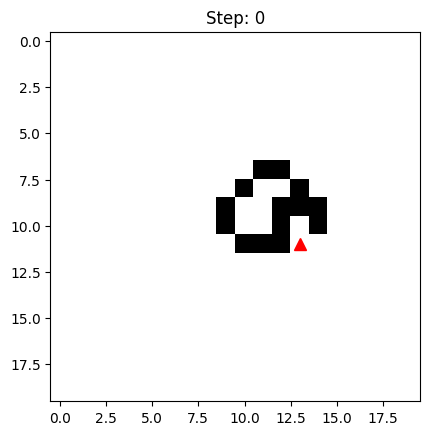

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


plt.rcParams['animation.html'] = 'jshtml'

class LangtonsAnt:
    def __init__(self, width, height, start_x, start_y):
        self.width = width
        self.height = height
        self.grid = np.zeros((width, height), dtype=int)
        self.ant_x = start_x
        self.ant_y = start_y
        self.direction = 0
        # 0: Up, 1: Right, 2: Down, 3: Left

        self.clockwise_kernel = np.array([[0, 1], [-1, 0]])
        self.counter_clockwise_kernel = np.array([[0, -1], [1, 0]])

    def move_forward(self):
        if self.direction == 0:
            self.ant_y = (self.ant_y - 1) % self.height
        elif self.direction == 1:
            self.ant_x = (self.ant_x + 1) % self.width
        elif self.direction == 2:
            self.ant_y = (self.ant_y + 1) % self.height
        else:
            self.ant_x = (self.ant_x - 1) % self.width

    def step(self):
        if self.grid[self.ant_x, self.ant_y] == 0:
            self.direction = (self.direction + 1) % 4
            self.grid[self.ant_x, self.ant_y] = 1
        else:
            self.direction = (self.direction - 1) % 4
            self.grid[self.ant_x, self.ant_y] = 0
        self.move_forward()


width = 20
height = 20
start_x = width // 2
start_y = height // 2
steps = 40


ant = LangtonsAnt(width, height, start_x, start_y)

fig, ax = plt.subplots()


grid_img = ax.imshow(ant.grid, cmap='binary')
ant_symbol, = ax.plot(ant.ant_y, ant.ant_x, marker='^', color='red', markersize=8)



def update(frame):
    ant.step()
    ax.imshow(ant.grid, cmap='binary')
    ax.set_title(f"Step: {frame}")


    grid_img.set_data(ant.grid)
    ant_symbol.set_data(ant.ant_y, ant.ant_x)
    ax.set_title(f"Step: {frame}")
    return grid_img, ant_symbol


FuncAnimation(fig, update, frames=steps, interval=150)



In [61]:
import timeit
def run_simulation():
    for i in range(steps):
        ant.step()

execution_time = timeit.timeit(run_simulation, number=1)

print(f" {steps} steps take {execution_time:.6f} seconds")

 40 steps take 0.000099 seconds
